#Import Section:
-----------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installs & Downloads:

In [ ]:
!pip install demoji



In [ ]:
import gensim
import nltk
import numpy
import tensorflow
import torch
from nltk.tokenize import WhitespaceTokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.models import *
from keras.layers import *
from keras.callbacks import *
import pandas as pd
import pickle
import numpy as np
import random
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Dense, Input, LSTM, GRU, Conv1D, MaxPooling1D, Concatenate  ,SimpleRNN
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.models import Sequential 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import random
import glob
%matplotlib inline
import demoji
import nltk



from nltk.corpus import wordnet



from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
import collections
import nltk
from collections import Counter
import re
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import vader
import multiprocessing as mp
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
demoji.download_codes()

nltk.download('all')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


... OK (Got response in 0.54 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.

True

#Helpers:


In [ ]:
#@title Default title text
# def count_hashTag(listOfPreProcessSent):
#   dicFinalLists =[{"hasTagCount":len(re.findall('\B#\w\w+',text))} for text in listOfPreProcessSent]
#   final_df = pd.DataFrame(dicFinalLists)
#   return final_df
#   """Count the Hashss Tags Heres"""



# #---------------------------------------------COUNT Punctuations--------------------------------------------------

# def countPnct(listOfPreProcessSent):
#     """Count the Pnctutaions Tags Heres"""
#     dicFinalLists =[{"pncICount":len(re.findall(r'\B[?|!]*([?!])\B', text))} for text in listOfPreProcessSent]
#     final_df = pd.DataFrame(dicFinalLists)
#     return final_df
    
#     # min. 2 or more

# # """Mathes: :( :) :P :p :O :3 :| :/ :\ :$ :* :@
# # :-( :-) :-P :-p :-O :-3 :-| :-/ :-\ :-$ :-* :-@
# # :^( :^) :^P :^p :^O :^3 :^| :^/ :^\ :^$ :^* :^@
# # ): (: $: *:
# # )-: (-: $-: *-:
# # )^: (^: $^: *^:
# # <3 </3 <\3
# # :smile: :hug: :pencil:"""    
# def countEmoticons(text):
#     POSITIVE = ["*O", "*-*", "*O*", "*o*", "* *",
#                 ":P", ":D", ":d", ":p",
#                 ";P", ";D", ";d", ";p",
#                 ":-)", ";-)", ":=)", ";=)",
#                 ":<)", ":>)", ";>)", ";=)",
#                 "=}", ":)", "(:;)",
#                 "(;", ":}", "{:", ";}",
#                 "{;:]",
#                 "[;", ":')", ";')", ":-3",
#                 "{;", ":]",
#                 ";-3", ":-x", ";-x", ":-X",
#                 ";-X", ":-}", ";-=}", ":-]",
#                 ";-]", ":-.)",
#                 "^_^", "^-^"]

#     NEGATIVE = [":(", ";(", ":'(",
#                 "=(", "={", "):", ");",
#                 ")':", ")';", ")=", "}=",
#                 ";-{{", ";-{", ":-{{", ":-{",
#                 ":-(", ";-(",
#                 ":,)", ":'{",
#                 "[:", ";]"
#                 ]
#     emoticon_string = r"""
#       (?:
#         [<>]?
#         [:;=8]                     # eyes
#         [\-o\*\']?                 # optional nose
#         [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
#         |
#         [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
#         [\-o\*\']?                 # optional nose
#         [:;=8]                     # eyes
#         [<>]?
#       )"""            
#     emoticon_re = re.compile(emoticon_string, re.VERBOSE | re.I | re.UNICODE)
#     """Count the Emoticons Tags Heres from Christopher regex"""
#     emoticonList=re.findall(emoticon_re,text)
       
#     posList=[e for e in emoticonList if e in POSITIVE] 
#     negList=[e for e in emoticonList if e in NEGATIVE]
#     lastOne=0
#     # print(text.split())
#     lastText=text.split()[-1]
#     if len(emoticonList)>0 and lastText in emoticonList:
#         if (emoticonList[-1]) in posList:
#             lastOne=1#Possitive
#         else:
#             lastOne=-1#Negetive
#     #"Positive":"Negative":"Last":
#     return  pd.Series(np.array([len(posList),len(negList),lastOne]))
# def countElongated(listOfPreProcessSent):
#     """Count the Elongateds Tags Heres"""

#     dicFinalLists =[{"elongatedCount":len(re.findall(r'(\w*)(\w+)(\2)(\w*)', text))} for text in listOfPreProcessSent]
#     final_df = pd.DataFrame(dicFinalLists)
#     return final_df
        



In [ ]:
# dict_sad={":-(":"SAD", ":(":"SAD", ":-|":"SAD",  ";-(":"SAD", ";-<":"SAD", "|-{":"SAD"}
# dict_happy={":-)":"HAPPY",":)":"HAPPY", ":o)":"HAPPY",":-}":"HAPPY",";-}":"HAPPY",":->":"HAPPY",";-)":"HAPPY"}

# #THE INPUT TEXT#
# a="guys beautifully done :-)" 

# for i in a.split():
#     for j in dict_happy.keys():
#         if set(j).issubset(set(i)):
#             print "HAPPY"
#             continue
#     for k in dict_sad.keys():
#         if set(k).issubset(set(i)):
#             print "SAD"
#             continue
#     if str(i)==i.decode('utf-8','replace'):
#        print i

In [ ]:

# # def findTheEMoticons(text):
# #   exactMatch = re.compile(ur"([^\.]*\bтурција\b[^\.]*)\.", re.UNICODE)
# #   print exactMatch.pattern
# #   result= exactMatch.findall(u"турција е на врвот од индустријата. турција е на врвот од индустријата.")
    
#   # posList=len(re.findall( ru"[\U0001f600-\U0001f650]", text))
#   # return pd.Series(np.array([len(posList)]))


# import emoji

# def extract_emojis(s):
#   return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)
# # 


# demoji.replace_with_desc("game is on 🔥 🔥", sep="")#replace_with_desc(#"game is on 🔥 🔥")

#Preprocess:

In [ ]:
#======================================================================================================
                       
                                       #PreProcessing

#==============================================================================================
def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon(In Most Cases Working) """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

def doPreProcess(text):

   # ----------------------[1.    Demoji]----------------------------------------------
  text=demoji.replace_with_desc(text, sep="")# Repalce with text


  #------------------------[2.   # and @ handling here]--------------------------------
  #Eiether-------------------------------------------
    # text=re.sub("([@#][A-Za-z0-9]+)","",text)#Replace by space those words with # and @

      #Or
  text=re.sub("([@#])","",text)#Replace by space the chars as  # and @
  #-----------------------------------------------------------


  #------------------------[3.    Remove the Links]--------------------------------
  text=re.sub(r"http\S+", "", text)#Remove the Links
 

  #-------------------------[4.   Emoticons Replacement with text]-------------------
  

  tokenizer = RegexpTokenizer(r'\w+')
  words=WhitespaceTokenizer().tokenize(text.lower())#tokenizer.tokenize(text)#Tokenize and casings
  df = pd.read_excel('/content/drive/MyDrive/Scraped Tweets/Emoticons_Emojis_Text.xlsx',sheet_name='Sheet2',header=0,converters={'Emoji':str,'Text':str,'Emoticons':str})
  dictOfEmoticons=df.set_index('Emoji')['Text'].to_dict()
  words=[dictOfEmoticons.get(x) if x in dictOfEmoticons.keys() else x for x in words]
  text=' '.join(words)



  #----------------------[5.       Ignore Non Ascii Characters]-----------------------
  encoded_string = text.encode("ascii", "ignore")  #For ASCII Onlys
  text = encoded_string.decode()

  #----------------------[6.       Single Quotes Handling Here Removal]---------------------:
  text=text.translate(str.maketrans("","", "'"))
  # text=text.translate(str.maketrans("","", string.punctuation))


  #---------------------[7.         Tokenizes]----------------------
  # tokenizer = RegexpTokenizer(r'\w+')
  words=WhitespaceTokenizer().tokenize(text)
 
  #---------------------[8.         Lower Case Folding]------------------------------
  # words=tokenizer.tokenize(text.lower())#Tokenize and casings

  #---------------------[9.         Replace Elongated Words]-------------------------------

  words=[replaceElongated(x) if not wordnet.synsets(x) else x for x in  words]



  #---------------------[10. & 11.        Stopwords Removal & Lematize]--------------------------------------------- 
  wnl = WordNetLemmatizer() 
  words=[wnl.lemmatize(word) for word in words]
  words=[word for word in words if word not in stopwords.words('english') ]

  finalText= ' '.join(words)

  #-------------------[11.                 Pnctations Removal]------------------------------
  return re.sub(r'[^\w\s]', '',finalText)


def preProcessing(df):
  
  df=df[['Text']]['Text'].apply(doPreProcess)
  return df

#======================================================================================================
                       
                                       #Global Data Frames

#==============================================================================================



#Run Here:


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Scraped Tweets/Copy of to_label_finished.csv")
df['Preprocessed_tweets']=df['Text'].apply(doPreProcess)

In [ ]:
df['Text']

0       ‼️GTA KISAAN EKTA CAR RALLY‼️\n\nSaturday Dece...
1       Dear #Annadaata it’s been 6th consecutive day ...
2       This actually broke my heart... An elderly Kis...
3       When farmers              When farmers \ndeman...
4       .@nsui Rajasthan is encircling the houses of B...
                              ...                        
2643    AAP MLA @JarnailSinghAAP arrested for protesti...
2644    This is a brutal and merciless attack by Modi ...
2645    From the barbed wires\n From the showers of wa...
2646    Orders from above - use 'misguised' for #Farme...
2647    AIKS is at the border with the Farmers. The Al...
Name: Text, Length: 2648, dtype: object

In [ ]:
# df["Label"]=df["Label"].replace("ANTI_FARMER","AF_PG")
# df["Label"]=df["Label"].replace("PRO_GOVT","AF_PG")
# df["Label"]=df["Label"].replace("ANTI_GOVT","AG_PF")
# df["Label"]=df["Label"].replace("PRO_FARMER","AG_PF")

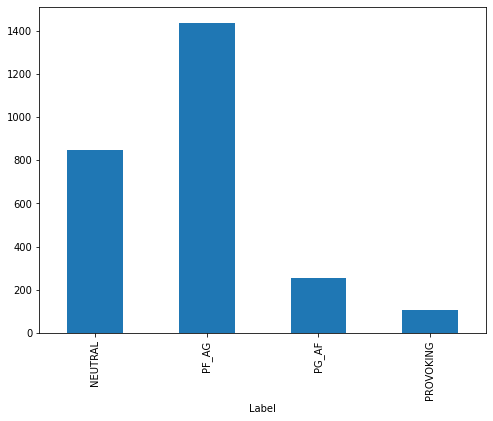

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
from sklearn import utils

In [ ]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Preprocessed_tweets']), tags=[r.Label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Preprocessed_tweets']), tags=[r.Label]), axis=1)

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()



# **DBOW MODEL**

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 2118/2118 [00:00<00:00, 1047463.26it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 2118/2118 [00:00<00:00, 1838099.70it/s]


CPU times: user 6.3 s, sys: 770 ms, total: 7.07 s
Wall time: 4.72 s


In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# param_grid = { 'max_iter':[100,1000],'penalty' : ['l1','l2'],'C': [0.1, 100, 1000,100000,1000000], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# grid_log = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
# grid_log.fit(X_train, y_train)

In [ ]:
print(grid_log.best_estimator_)

In [ ]:
import pickle


logreg = LogisticRegression(n_jobs=-1, C=100, max_iter=100, penalty='l2', solver='newton-cg')
pickle.dump(logreg,open('/content/drive/MyDrive/Scraped Tweets/models/dbow.pkl','wb'))
logreg=pickle.load(open("/content/drive/MyDrive/Scraped Tweets/models/dbow.pkl", 'rb'))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
from sklearn.metrics import accuracy_score, f1_score
print('Training accuracy %s' % accuracy_score(y_train, y_pred_train))
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

Training accuracy 0.5996222851746931
Testing accuracy 0.5339622641509434


In [ ]:
sv_dbow = SVC(C=10, kernel='rbf', gamma=0.0001)
sv_dbow.fit(X_train, y_train)
y_pred = sv_dbow.predict(X_test)
y_pred_train = logreg.predict(X_train)
from sklearn.metrics import accuracy_score, f1_score
print('Training accuracy %s' % accuracy_score(y_train, y_pred_train))
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

Training accuracy 0.5774315391879131
Testing accuracy 0.5452830188679245


# **DM MODEL**

In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 1123/1123 [00:00<00:00, 684622.59it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 1123/1123 [00:00<00:00, 1546356.99it/s]


CPU times: user 6.23 s, sys: 505 ms, total: 6.74 s
Wall time: 4.36 s


In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
pickle.dump(logreg,open('/content/drive/MyDrive/Scraped Tweets/models/dmm.pkl','wb'))
logreg=pickle.load(open("/content/drive/MyDrive/Scraped Tweets/models/dmm.pkl", 'rb'))
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Testing accuracy 0.536
Testing F1 score: 0.5472821183393265


In [ ]:
sv_dm = SVC(C=10, kernel='rbf', gamma=0.0001)
sv_dm.fit(X_train, y_train)
y_pred = sv_dbow.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.536
Testing F1 score: 0.3740833333333334


#TFIDF Vectorizer

In [ ]:
df["tweet_class"]=df["Label"]

In [ ]:
df["tweet_class"]=df["tweet_class"].replace("AG_PF",0)
df["tweet_class"]=df["tweet_class"].replace("AF_PG",1)
df["tweet_class"]=df["tweet_class"].replace("NEUTRAL",2)
df["tweet_class"]=df["tweet_class"].replace("PROVOKING",3)

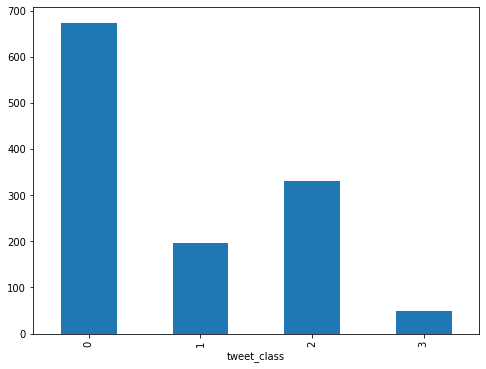

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('tweet_class').Text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
labels = df.tweet_class
features.shape

(1248, 1020)

In [ ]:
def ConvertListToDictionary(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [ ]:
tweet_to_id_dict = ConvertListToDictionary(["AG_PF",0,"AF_PG",1,"NEUTRAL",2,"PROVOKING",3])
id_to_tweet_dict = ConvertListToDictionary([0,"AG_PF",1,"AF_PG",2,"NEUTRAL",3,"PROVOKING"])

In [ ]:
from sklearn.feature_selection import chi2

N = 2
for label, class_id in sorted(tweet_to_id_dict.items()):
  features_chi2 = chi2(features, labels == class_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'AF_PG':
  . Most correlated unigrams:
. indiatogether
. indiaagainstpropaganda
  . Most correlated bigrams:
. indiaagainstpropaganda https
. indiaagainstpropaganda indiatogether
# 'AG_PF':
  . Most correlated unigrams:
. indiaagainstpropaganda
. indiatogether
  . Most correlated bigrams:
. support farmers
. indiaagainstpropaganda indiatogether
# 'NEUTRAL':
  . Most correlated unigrams:
. border
. meeting
  . Most correlated bigrams:
. uttar pradesh
. verified ðÿ
# 'PROVOKING':
  . Most correlated unigrams:
. retweet
. 1984
  . Most correlated bigrams:
. farmersprotest hailhailfarmers
. farmersprotest takebackfarmbills


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'],test_size=0.2, random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
clf.score(X_train_tfidf,y_train)

0.6603206412825652

In [ ]:
clf.score(X_test_tfidf,y_test)

0.556

In [ ]:
# from sklearn.model_selection import GridSearchCV
  

# param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  

# grid.fit(X_train_tfidf, y_train)

In [ ]:
# print(grid.best_estimator_)

In [ ]:
model_grid_svm = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

model_grid_svm.fit(X_train_tfidf,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(model_grid_svm.score(X_train_tfidf,y_train))
print(model_grid_svm.score(X_test_tfidf,y_test))

0.996993987975952
0.66
